In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score


In [18]:
road = 7
direction = "in"
df = pd.read_csv(
    f"../dataset/cluster/2020-02-road{road}-{direction}-5cluster.csv", parse_dates=["datetime"])
df['label'] = df['cluster'].apply(lambda row: 1 if row == 0 or row == 1 else 0)
df


,datetime,road_number,km,direction,all_units,inflow_units,outflow_unit,samecell_units,avg_speed,max_speed,avg_traveltime,max_traveltime,inflow_units_N,outflow_units_N,avg_speed_N,cluster,label
0,2020-02-01 00:00:34,7,2,in,3,3,0,0,59,81,60,61,0.057692,0.000000,0.7375,2,0
1,2020-02-01 00:00:34,7,3,in,0,0,5,0,0,0,0,0,0.000000,0.113636,0.0000,1,1
2,2020-02-01 00:00:34,7,6,in,1,0,3,1,5,5,0,0,0.000000,0.068182,0.0625,1,1
3,2020-02-01 00:00:34,7,7,in,1,1,4,0,72,72,20,20,0.019231,0.090909,0.9000,3,0
4,2020-02-01 00:00:34,7,10,in,10,7,6,3,69,103,43,60,0.134615,0.136364,0.8625,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4503722,2020-02-29 23:59:14,7,108,in,2,2,2,0,38,52,68,76,0.038462,0.045455,0.4750,0,1
4503723,2020-02-29 23:59:14,7,109,in,1,1,3,0,36,36,60,60,0.019231,0.068182,0.4500,0,1
4503724,2020-02-29 23:59:14,7,111,in,1,1,0,0,64,64,60,60,0.019231,0.000000,0.8000,2,0
4503725,2020-02-29 23:59:14,7,114,in,0,0,1,0,0,0,0,0,0.000000,0.022727,0.0000,1,1


In [19]:
df.max(axis=0)

datetime           2020-02-29 23:59:14
road_number                          7
km                                 124
direction                           in
all_units                           78
inflow_units                        52
outflow_unit                        44
samecell_units                      49
avg_speed                           80
max_speed                          184
avg_traveltime                     928
max_traveltime                     998
inflow_units_N                     1.0
outflow_units_N                    1.0
avg_speed_N                        1.0
cluster                              4
label                                1
dtype: object

In [20]:
df_corr = df.filter(['all_units','inflow_units','outflow_unit','samecell_units','avg_speed','max_speed','avg_traveltime','max_traveltime','cluster','label'],axis=1)
corr = df_corr.corr()

<AxesSubplot:>

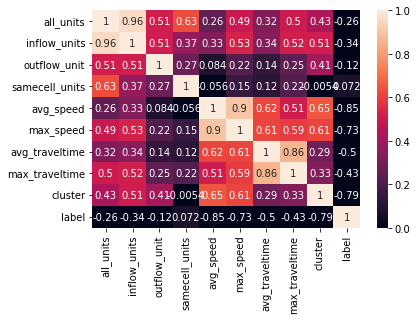

In [21]:
sns.heatmap(corr, vmin=0, vmax=1, annot=True)


In [22]:
num_cols = ['all_units', 'inflow_units',
            'avg_speed', 'max_speed',
            'avg_traveltime',"max_traveltime"]
num_cols

['all_units',
 'inflow_units',
 'avg_speed',
 'max_speed',
 'avg_traveltime',
 'max_traveltime']

In [23]:
X=df[num_cols]
y=df['cluster']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [26]:
y_pred = tree.predict(x_test)

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96    140451
           1       1.00      1.00      1.00    175054
           2       0.89      0.91      0.90    526115
           3       0.94      0.94      0.94    456479
           4       0.61      0.56      0.58    188131

    accuracy                           0.89   1486230
   macro avg       0.88      0.88      0.88   1486230
weighted avg       0.89      0.89      0.89   1486230



In [28]:
print(accuracy_score(y_test, y_pred))

0.8924136910168682


In [29]:
confusion_matrix(y_test, y_pred)

array([[134023,     87,   1595,      0,   4746],
       [    92, 174962,      0,      0,      0],
       [  1140,      0, 480633,   2330,  42012],
       [     0,      0,   3868, 430470,  22141],
       [  4337,      0,  51630,  25920, 106244]], dtype=int64)

In [30]:
conf_matrix = confusion_matrix(y_test, y_pred)

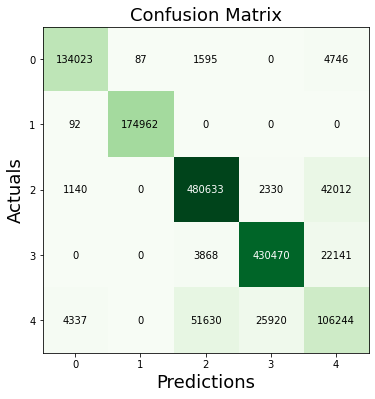

In [31]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [32]:
# import joblib
# joblib.dump(tree, f"DecisionTreeModelRoad{road}{direction}.joblib")
